## Phase 3 Project
* John KIoko Mutuku

## INTRODUCTION
This data-driven project focuses on predicting H1N1 vaccine uptake by employing advanced analytics and machine learning. The goal is to understand and influence factors affecting vaccine acceptance amidst evolving public health challenges. The project utilizes diverse variables such as demographics and health opinions, employing techniques like exploratory data analysis, feature engineering, and machine learning algorithms like logistic regression and decision trees. The objective is not just accurate predictions but actionable insights to improve vaccination coverage and strengthen public health initiatives, blending quantitative analytics with advocacy for proactive healthcare strategies.

## PROBLEM STATEMENT
Recent flu outbreaks, including COVID-19, H1N1, and H5N1, underscore the global health impact of flu. Despite effective vaccines, low vaccination rates persist in the US, averaging 57.8% in 2022 according to CDC estimates. To address this, we aim to investigate reasons behind vaccine hesitancy, focusing on understanding key factors influencing opinions, perceptions, and behaviors related to flu vaccination.

## OBJECTIVES AND GOALS
This data science project aims to develop a predictive model to assess H1N1 and Seasonal flu vaccine likelihood based on demographics and attitudes. Factors considered include opinions, demographics (age, education, employment, income), behaviors (handwashing, masking, crowd avoidance), and the influence of doctors' recommendations. The objective is to analyze these factors and provide insights into individuals' decision-making on flu vaccination, enabling targeted strategies by governments and healthcare organizations to enhance vaccination rates and public health outcomes

### DATA UNDERSTANDING

In [1]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [2]:
!pip install tabulate

#### DATA EXPLORATION
Loading data Into Dataframes

In [3]:
# Loading the characteristics of the respondents
data_1 = pd.read_csv("Flu_Datasets/training_set_features (1).csv")
data_1.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN


In [4]:
# Load dataset indicating H1N1 and seasonal flu vaccine status
data_2 = pd.read_csv("Flu_Datasets/training_set_labels.csv")
data_2.head(10)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
5,5,0,0
6,6,0,0
7,7,1,1
8,8,0,0
9,9,0,0


From the two datasets (data_1 and data_2) it is recommended that we merge the two datasets inorder to have a detailed and a more comprehensive dataset with both features and target variables.

In [5]:
# Merging the two dataframes data_1 and data_2
combined_data = pd.merge(data_1, data_2, on="respondent_id")
combined_data.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov,0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo,0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp,0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,0


Exploring the Newly Created Datafarme to get an overview

In [6]:
# Getting Information about the dataset
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [7]:
# Checking the summary Statistics
combined_data.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [8]:
# Checking the shape of the dataframe
combined_data.shape

(26707, 38)

## DATA PREPROCESSING
Missing Values

In [9]:
# Checking for Missing values
combined_data.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

We will drop the columns with the highest missing values
1. health_insurance
2. employment_industry
3. employment_occuptaion

In [10]:
# Dropping the columns with the highest missing values
combined_data.drop(['health_insurance', 'employment_occupation', 'employment_industry'], axis=1, inplace=True)
combined_data.isnull().sum()

respondent_id                     0
h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_h1n1               2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                 

Further Handling of missing values

In [11]:
# Filling missing values for numeric datatypes with Median 
numeric_cols = combined_data.select_dtypes(exclude='object').columns
combined_data[numeric_cols] = combined_data[numeric_cols].fillna(combined_data[numeric_cols].median())

In [12]:
# Filling missing values for Object Datatypes with Mode
object_cols = combined_data.select_dtypes(include='object').columns
combined_data[object_cols] = combined_data[object_cols].fillna(combined_data[object_cols].mode().iloc[0])
# The .mode().iloc[0] is used to handle cases where a column has multiple modes.

In [13]:
# Checking Remaining Missing Values
combined_data.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

Observation
From the above two codes, i have replaced the remaining Columns' missing values with mode (for the object dtypes) and median (for num dtypes) rather than dropping the columns. This is because the columns are in the objectives

Duplicate Values

In [14]:
# Checking for Duplicate Values
combined_data.duplicated().sum()

0

There are no Duplicated values in our dataset

For the purposes of EDA we will create a copy of our dataset inorder to transform the data into different data types to suite the EDA process

In [15]:
# Creating copies from our original dataset
eda_data = combined_data.copy()

# confirming if they are equal
eda_data == combined_data

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
26703,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
26704,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
26705,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [16]:
eda_data

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",0.0,0.0,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,0,0


In [17]:
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

Data Mapping - We will Map the region column to suit our objectives in terms of the Demographic background analysis

In [18]:
# Classifying the region column into appropriate groups by using Mapping

hhs_geo_region = {"hhs_geo_region": {"lzgpxyit": "Town A", "fpwskwrf": "Town B", "qufhixun": "Town C",
                                     "oxchjgsf": "Town D", "kbazzjca": "Town E",
                                     "bhuqouqj": "Town F", "mlyzmhmf": "Town G",
                                     "lrircsnp": "Town H", "atmpeygn": "Town I", "dqpwygqj": "Town J"}}

eda_data = eda_data.replace(hhs_geo_region)

In [19]:
# Confirming whether the region column has effected the Mapping
print(eda_data['hhs_geo_region'].unique())

['Town D' 'Town F' 'Town C' 'Town H' 'Town I' 'Town A' 'Town B' 'Town G'
 'Town J' 'Town E']


Data Transformation - This is done to make data more interpretable and user-friendly
In the below we will transform the opinion columns because it is a requirement from our objectives 

In [20]:
# opinion_h1n1_vacc_effective

eda_data.opinion_h1n1_vacc_effective = eda_data.opinion_h1n1_vacc_effective.replace({
    1: "Not at all effective",
    2: "Not very effective",
    3: "Don't know",
    4: "Somewhat effective",
    5: "Very effective"
})

In [21]:
# opinion_h1n1_risk

eda_data.opinion_h1n1_risk = eda_data.opinion_h1n1_risk.replace({
    1: "Very Low",
    2: "Somewhat low",
    3: "Don't know",
    4: "Somewhat high",
    5: "Very high"
})

In [22]:
# opinion_seas_vacc_effective

eda_data.opinion_seas_vacc_effective = eda_data.opinion_seas_vacc_effective.replace({
    1: "Not at all effective",
    2: "Not very effective",
    3: "Don't know",
    4: "Somewhat effective",
    5: "Very effective"
})

In [23]:
# opinion_h1n1_sick_from_vacc

eda_data.opinion_h1n1_sick_from_vacc = eda_data.opinion_h1n1_sick_from_vacc.replace({
    1: "Not at all worried",
    2: "Not very worried",
    3: "Don't know",
    4: "Somewhat worried",
    5: "Very worried"
})

In [24]:
# opinion_seas_risk

eda_data.opinion_seas_risk = eda_data.opinion_seas_risk.replace({
    1: "Very Low",
    2: "Somewhat low",
    3: "Don't know",
    4: "Somewhat high",
    5: "Very high"
})

In [25]:
# opinion_seas_sick_from_vacc

eda_data.opinion_seas_sick_from_vacc = eda_data.opinion_seas_sick_from_vacc.replace({
    1: "Not at all worried",
    2: "Not very worried",
    3: "Don't know",
    4: "Somewhat worried",
    5: "Very worried"
})

## EXPLORATORY DATA ANALYSIS
Univariate Analysis

Text(0.5, 1.0, 'Distribution of Education groups')

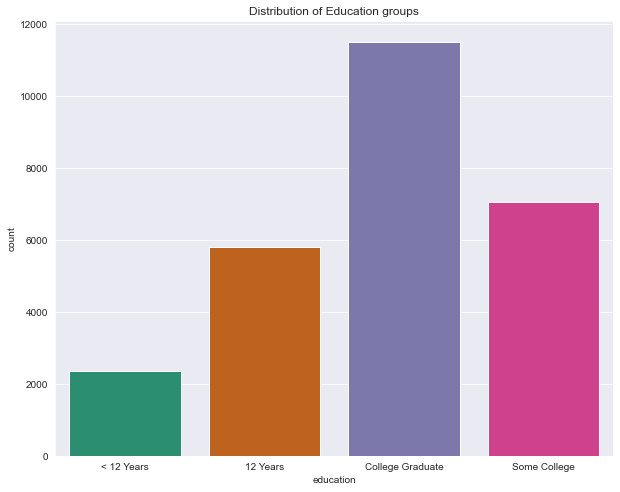

In [26]:
# Distribution of Education groups
plt.figure(figsize=(10, 8))
sns.countplot(x="education", data=eda_data, palette='Dark2')
plt.title("Distribution of Education groups")

>Most vaccine intake is seen on college graduates respondents

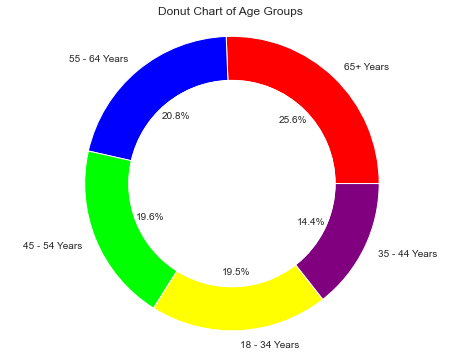

In [27]:
# Checking the distribution in the Age column

# Define the colors for each category
colors = ['#FF0000', '#0000FF', '#00FF00', '#FFFF00', '#800080']

# Get the count of each category
category_count = eda_data['age_group'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_count, labels=category_count.index, colors=colors, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title('Donut Chart of Age Groups')

# Create a white circle in the middle for the donut effect
centre_circle = plt.Circle((0, 0), 0.7, color='white', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.show()

> Most of the respondents were older than 65 years.

Text(0.5, 1.0, 'Race Distribution')

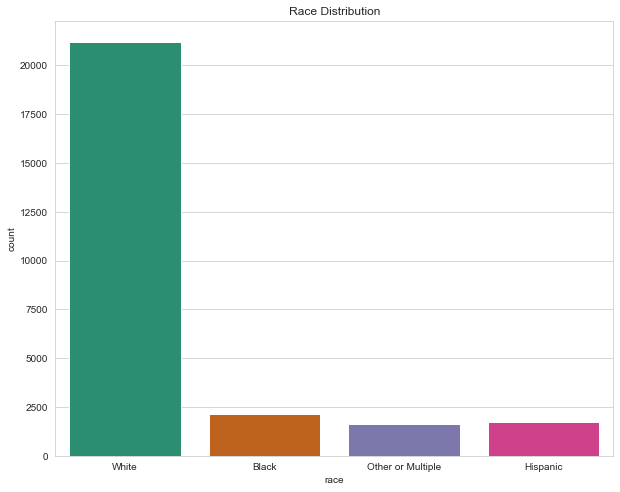

In [28]:
# Checking the distribution in the Age column

sns.set_style("whitegrid")

plt.figure(figsize=(10, 8))
sns.countplot(x="race", data=eda_data, palette='Dark2')
plt.title("Race Distribution")

> Most respondents were white caucasians

Text(0.5, 1.0, 'Distribution of Gender')

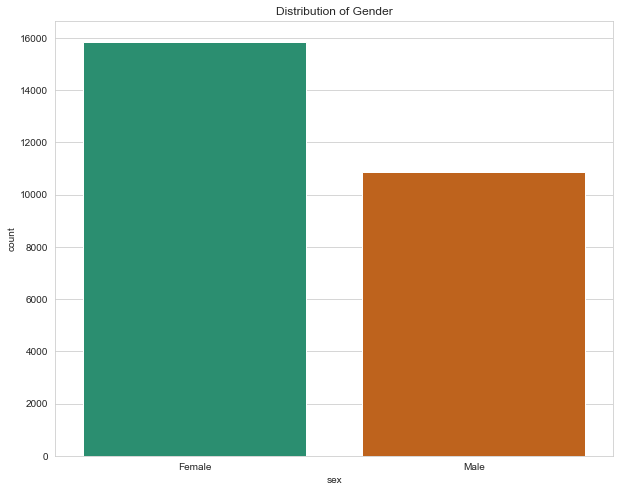

In [29]:
# Checking the distribution in the Gender column
# Set the style
sns.set_style("whitegrid")

# Create the count plot with a specific palette
plt.figure(figsize=(10, 8))
sns.countplot(x="sex", data=eda_data, palette='Dark2')
plt.title("Distribution of Gender")

> Most respondents were female

Text(0.5, 1.0, 'Distribution of income classes')

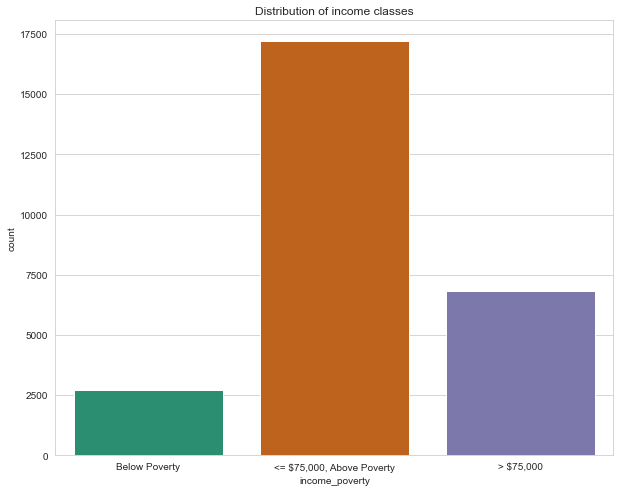

In [30]:
#Distribution of income classes
sns.set_style("whitegrid")

plt.figure(figsize=(10,8))
sns.countplot(x= "income_poverty", data = eda_data ,palette = 'Dark2')
plt.title("Distribution of income classes")

> Most respondents were above the income poverty line

Text(0.5, 1.0, 'Distribution of marital status')

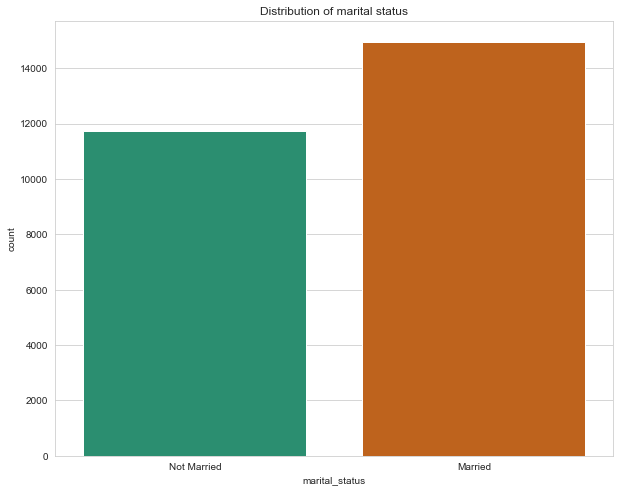

In [31]:
#Distribution of marital status
sns.set_style("whitegrid")

plt.figure(figsize=(10,8))
sns.countplot(x= "marital_status", data = eda_data ,palette = 'Dark2')
plt.title("Distribution of marital status")

> Most respondents were married

Text(0.5, 1.0, 'Distribution of renters and owners')

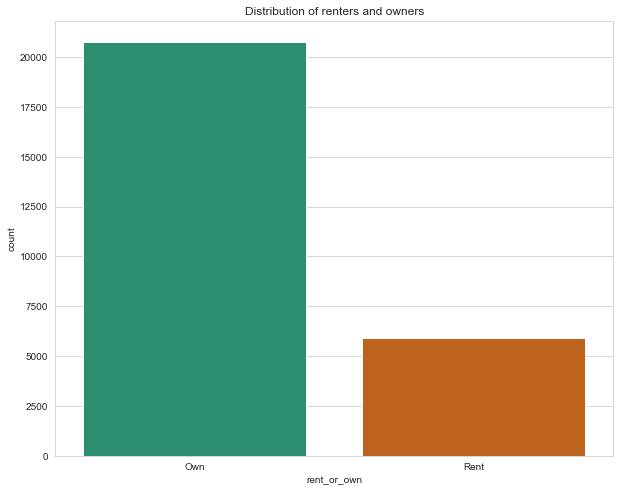

In [32]:
#Distribution of house situation
sns.set_style("whitegrid")

plt.figure(figsize=(10,8))
sns.countplot(x= "rent_or_own", data = eda_data ,palette = 'Dark2')
plt.title("Distribution of renters and owners")

> Most respondents were owning their own houses

Text(0.5, 1.0, 'Distribution of census metropolitan Statistical Area')

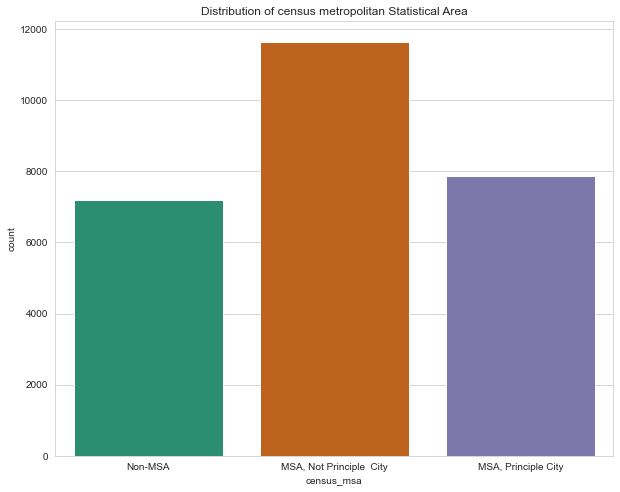

In [33]:
#Distribution of census metropolitan Statistical Area
sns.set_style("whitegrid")

plt.figure(figsize=(10,8))
sns.countplot(x= "census_msa", data = eda_data ,palette = 'Dark2')
plt.title("Distribution of census metropolitan Statistical Area")

> Most respondents live around MSA

Text(0.5, 1.0, 'Distribution of h1n1 vaccine.')

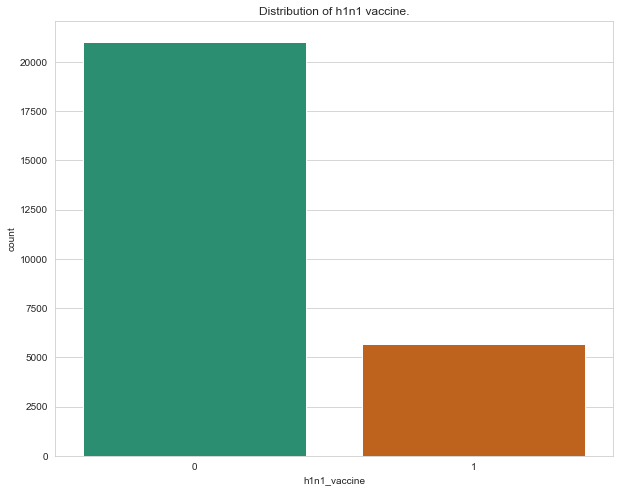

In [34]:
#Distribution of h1n1 vaccine.
sns.set_style("whitegrid")

plt.figure(figsize=(10,8))
sns.countplot(x= "h1n1_vaccine", data = eda_data ,palette = 'Dark2')

plt.title("Distribution of h1n1 vaccine.")

Text(0.5, 1.0, 'Distribution of seasonal flu vaccine')

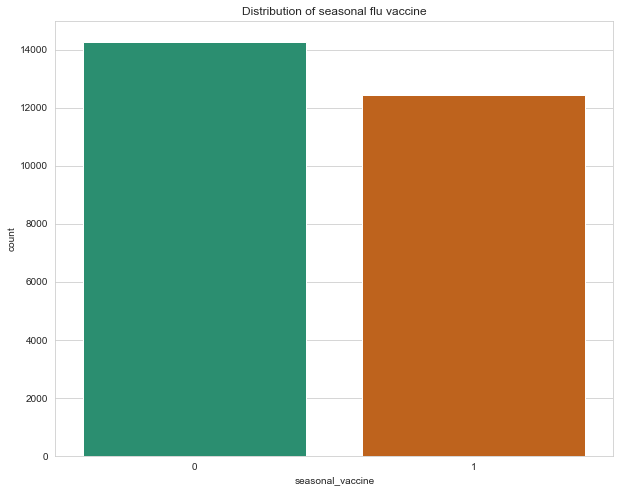

In [35]:
#Distribution of seasonal flu vaccine
sns.set_style("whitegrid")

plt.figure(figsize=(10,8))
sns.countplot(x= "seasonal_vaccine", data = eda_data ,palette = 'Dark2')

plt.title("Distribution of seasonal flu vaccine")

> As seen , the seasonal flu vaccine has a balanced classes compared to the h1n1 flu vaccine 

Text(0.5, 1.0, 'Relation of the concern one has about the virus and getting vaccinated.')

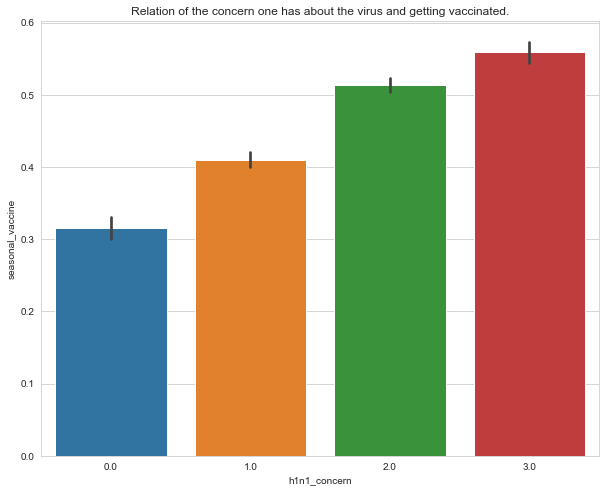

In [36]:
# relation between the concern one has about the virus and getting vaccinated

sns.set_style("whitegrid")

bar, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data= eda_data, x="h1n1_concern", y="seasonal_vaccine")

plt.title("Relation of the concern one has about the virus and getting vaccinated.")

> As seen from the chart, the people who are mostly concerned with the virus are likely to get the seasonal flu vaccine

Text(0.5, 1.0, 'Relation of the age group and getting vaccinated.')

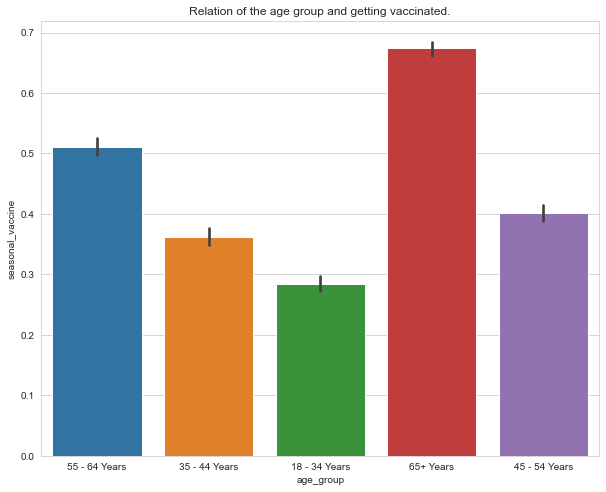

In [37]:
# relation between the age group and getting vaccinated
sns.set_style("whitegrid")

plt.figure(figsize=(10, 8))
sns.barplot(data=eda_data, x="age_group", y="seasonal_vaccine")

plt.title("Relation of the age group and getting vaccinated.")

> From the above chart, people who are over 65 have received seasonal flu vaccine

Text(0.5, 1.0, 'Relation of having a chronic medical condition and getting vaccinated.')

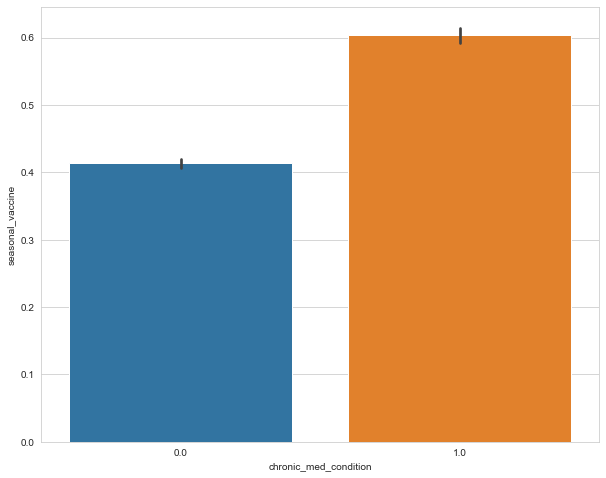

In [38]:
#relation between one having a chronic medical condition and getting vaccinated
sns.set_style("whitegrid")

plt.figure(figsize=(10,8))
sns.barplot(data= eda_data, x="chronic_med_condition",y="seasonal_vaccine")

ax.set_title("Relation of having a chronic medical condition and getting vaccinated.")

> People who were believed to have chronic conditions had a higher chance of seasonal flu vaccination

Text(0.5, 1.0, 'Relation of being a health worker and getting vaccinated.')

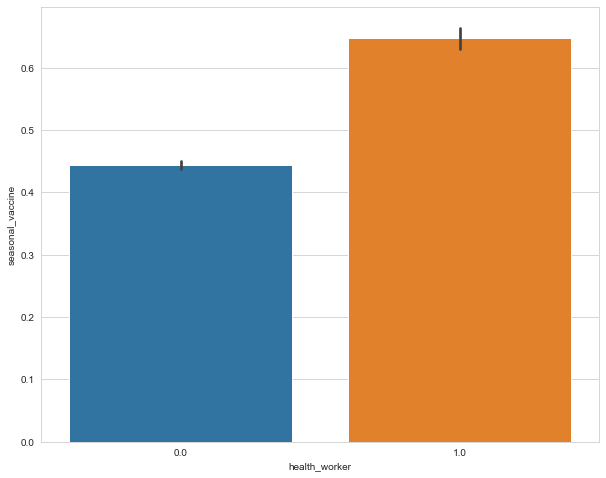

In [39]:
#Relation between being a health worker and getting a seasonal flu vaccine 
sns.set_style("whitegrid")

plt.subplots(figsize=(10,8))
sns.barplot(data=eda_data, x="health_worker",y="seasonal_vaccine")

ax.set_title("Relation of being a health worker and getting vaccinated.")

> People who work in clinical environments had a higher chance of seasonal flu vaccination because of their exposure to diseases

Text(0.5, 1.0, 'Relation between level of education and getting vaccinated.')

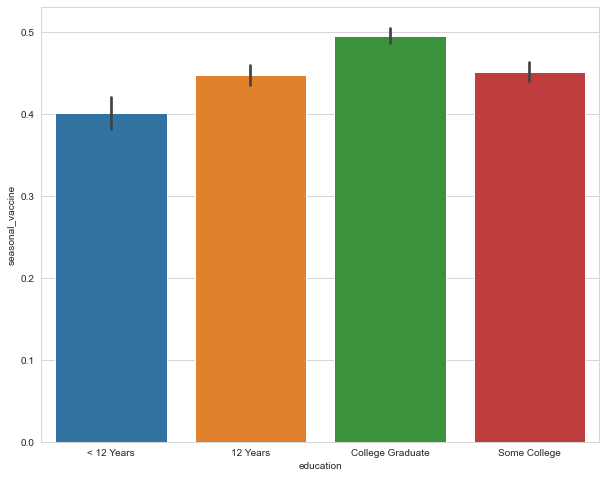

In [40]:
#Relation between level of education and getting a seasonal flu vaccine.
sns.set_style("whitegrid")

plt.subplots(figsize=(10,8))
sns.barplot(data= eda_data, x="education",y="seasonal_vaccine")

ax.set_title("Relation between level of education and getting vaccinated.")

> College graduates indicated a higher chance of getting seasonal flu vaccine